# Calculation of median and variance using bootstrap confidence interval

In [35]:
#Load packages
import numpy as np
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [36]:
#Read the data set
df = pd.read_csv('haberman.csv', names = ['Age','Op_Year','axil_nodes','Surv_status'])
df

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [37]:
print(df['Age'].max())
print(df['Age'].min())

83
30


In [38]:
#Transfer only one column
df1 = df['Age']

In [39]:
type(df1)

pandas.core.series.Series

In [40]:
df1

0      30
1      30
2      30
3      31
4      31
       ..
301    75
302    76
303    77
304    78
305    83
Name: Age, Length: 306, dtype: int64

# Objective
Calculate 95% confidence interval for age list of Haberman's data (using bootstrap C.I.)

In [47]:
#Required confidence level
ci = 95

#Number of sample sets
ci_iterations = 1000

#Size of each sample
ci_size = 30

#Empty list to store medians of samples
medians = []

for i in range(ci_iterations):
    sample = resample(df1, n_samples = ci_size)
    median = np.median(sample)
    medians.append(median)

medians

[52.5,
 51.5,
 53.5,
 50.5,
 50.5,
 50.5,
 52.0,
 58.0,
 53.5,
 52.0,
 54.0,
 49.5,
 50.0,
 50.0,
 48.5,
 55.5,
 54.0,
 50.5,
 50.0,
 52.0,
 54.0,
 50.0,
 50.0,
 53.0,
 54.5,
 52.0,
 51.5,
 51.5,
 59.5,
 58.0,
 46.5,
 52.5,
 52.0,
 50.5,
 53.5,
 55.5,
 56.5,
 53.0,
 52.5,
 53.5,
 53.0,
 54.5,
 49.5,
 52.5,
 53.5,
 54.0,
 52.0,
 49.5,
 54.0,
 54.5,
 52.0,
 48.0,
 52.0,
 52.5,
 51.5,
 51.0,
 53.0,
 52.0,
 51.0,
 51.0,
 49.0,
 52.0,
 49.5,
 52.5,
 58.5,
 51.0,
 51.0,
 54.0,
 55.0,
 56.0,
 56.5,
 50.0,
 56.0,
 52.5,
 54.0,
 54.5,
 46.5,
 55.0,
 48.5,
 54.0,
 50.0,
 54.0,
 50.5,
 49.5,
 53.0,
 55.0,
 58.0,
 54.5,
 53.0,
 49.5,
 52.5,
 52.0,
 51.5,
 53.0,
 52.5,
 47.0,
 56.5,
 52.5,
 47.0,
 49.0,
 49.0,
 49.0,
 52.0,
 49.5,
 52.0,
 52.0,
 49.5,
 49.5,
 55.0,
 53.5,
 54.0,
 54.0,
 54.0,
 47.0,
 50.0,
 52.0,
 48.5,
 51.0,
 55.5,
 56.5,
 54.0,
 52.5,
 52.5,
 52.5,
 49.0,
 52.5,
 52.5,
 53.0,
 51.5,
 50.0,
 53.0,
 52.5,
 51.5,
 49.0,
 51.5,
 49.0,
 51.0,
 52.5,
 53.0,
 55.0,
 54.0,
 50.0,
 56.5,

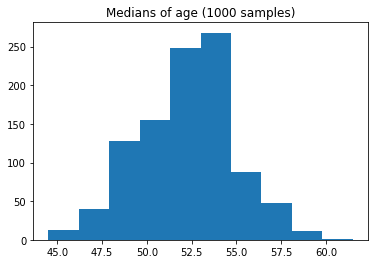

In [48]:
#Sorting not required as np percentile function automatically computes from sorted list
#medians.sort()

plt.title('Medians of age (1000 samples)')
#plt.xlabel('Age')
plt.hist(medians)
plt.show()

In [57]:
#TODO Figure out logic to identify cutoff value
# alpha = ( ci_iterations - ci ) / 2
# alpha

alpha = 0.95
low = ( (1 - alpha) / 2 ) * 100
high = ci + low

print(low)
print(high)

lower_lim = np.percentile(medians,low)
upper_lim = np.percentile(medians,high)
print("The median age is [{0},{1}] with {2}% confidence".format(np.percentile(medians,low),np.percentile(medians,high),ci))

2.500000000000002
97.5
The median age is [47.0,57.5] with 95% confidence
